<h1>Project 9</h1>

<h2>COVID 19 Dataset</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***


In [2]:
df=pd.read_csv('COVID_19_Dataset.csv')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


<h2>Start of EDA process</h2>

***Checking shape of the Dataset***

In [3]:
df.shape

(58, 18)

***Checking data types and null count of the columns***

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

We can see that there are many null values in the dataset

***Handling null values***

In [5]:
df.dropna(subset=["Recovered"], axis=0, inplace=True)
df.dropna(subset=["People_Hospitalized"], axis=0, inplace=True)
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

***Resetting index as we have dropped few rows***

In [6]:
df.reset_index(drop=True, inplace=True)

In [7]:
df_group= df[['Province_State','Confirmed','Deaths','Recovered']]
df_group1= df_group.groupby(['Province_State'],as_index=False).mean()
df_group1.max()

Province_State    Wyoming
Confirmed          354370
Deaths              28636
Recovered           61886
dtype: object

Wyoming stands highest with high number of Confirmed cases

In [8]:
df_group1.min()

Province_State    Arizona
Confirmed             478
Deaths                 11
Recovered             440
dtype: object

Arizona stands lowest with low number of Confirmed cases

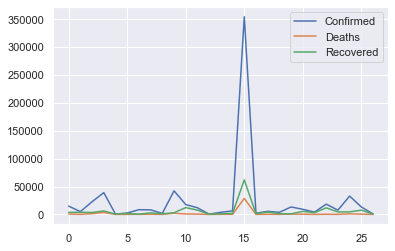

In [9]:
df_group1.plot()

In [10]:
df['Province_State'].unique

<bound method Series.unique of 0            Arizona
1           Arkansas
2           Colorado
3        Connecticut
4             Hawaii
5              Idaho
6             Kansas
7           Kentucky
8              Maine
9           Maryland
10         Minnesota
11       Mississippi
12           Montana
13     New Hampshire
14        New Mexico
15          New York
16      North Dakota
17          Oklahoma
18            Oregon
19      Rhode Island
20    South Carolina
21      South Dakota
22         Tennessee
23              Utah
24          Virginia
25         Wisconsin
26           Wyoming
Name: Province_State, dtype: object>

There are no unique values all are different province

**Since we are only considering US with different province and all province are unique, we will try to predict number of cofirmed cases for whole of US**

In [11]:
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
1,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
2,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
3,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
4,Hawaii,US,2020-05-21 02:32:54,21.0943,-157.4983,643,17,578.0,48.0,15,45.413710,46304.0,82.0,2.643857,84000015,USA,3270.352122,12.752722


In [12]:
df=df[['Confirmed','Deaths','Recovered','Active','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']]

***Lets find correlation***

In [13]:
df.corr()

,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Confirmed,1.000000,0.997013,0.967922,0.998308,0.775958,0.979904,0.998190,0.515160,0.338689,0.357310
Deaths,0.997013,1.000000,0.963701,0.994986,0.771385,0.970354,0.998785,0.530654,0.342883,0.362681
Recovered,0.967922,0.963701,1.000000,0.951829,0.704359,0.979439,0.962082,0.460893,0.310426,0.302197
Active,0.998308,0.994986,0.951829,1.000000,0.785693,0.971803,0.997059,0.521169,0.341574,0.366103
Incident_Rate,0.775958,0.771385,0.704359,0.785693,1.000000,0.738453,0.778617,0.590741,0.657726,0.380824
People_Tested,0.979904,0.970354,0.979439,0.971803,0.738453,1.000000,0.972705,0.478776,0.362414,0.349774
People_Hospitalized,0.998190,0.998785,0.962082,0.997059,0.778617,0.972705,1.000000,0.538557,0.336722,0.387280
Mortality_Rate,0.515160,0.530654,0.460893,0.521169,0.590741,0.478776,0.538557,1.000000,0.149889,0.787024
Testing_Rate,0.338689,0.342883,0.310426,0.341574,0.657726,0.362414,0.336722,0.149889,1.000000,-0.012372
Hospitalization_Rate,0.357310,0.362681,0.302197,0.366103,0.380824,0.349774,0.387280,0.787024,-0.012372,1.000000


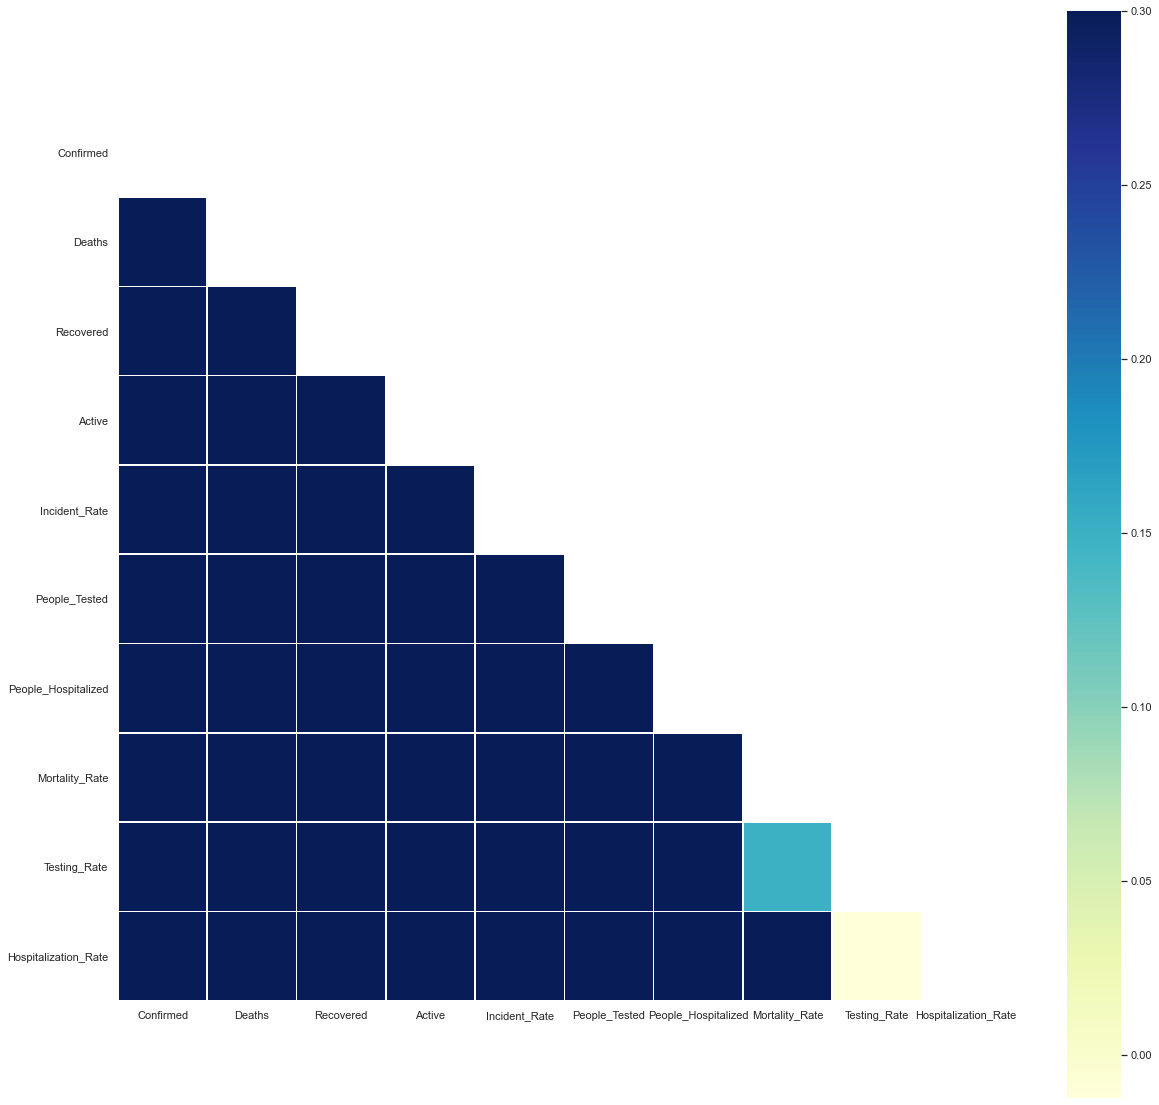

In [14]:
import numpy as np
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=0.5,cmap="YlGnBu")

***Lets visualize our continuous variables with our output variable***

AxesSubplot(0.125,0.125;0.775x0.755)


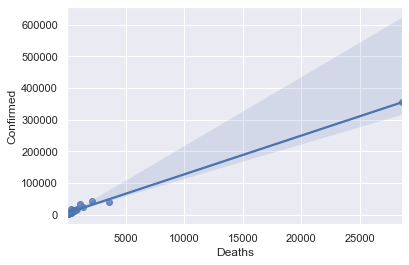

AxesSubplot(0.125,0.125;0.775x0.755)


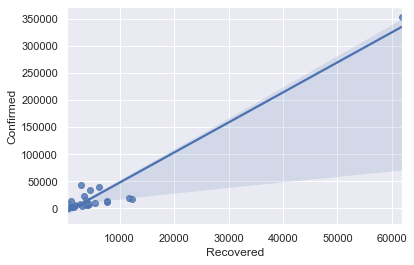

AxesSubplot(0.125,0.125;0.775x0.755)


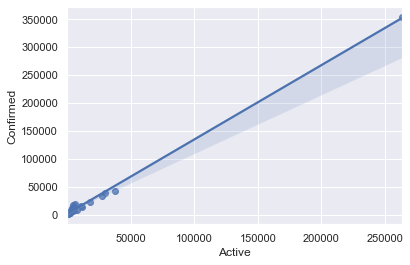

AxesSubplot(0.125,0.125;0.775x0.755)


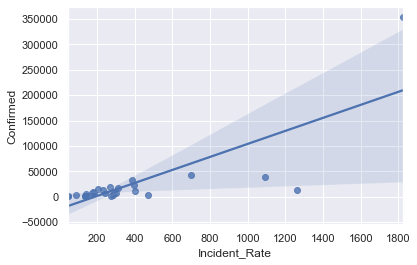

AxesSubplot(0.125,0.125;0.775x0.755)


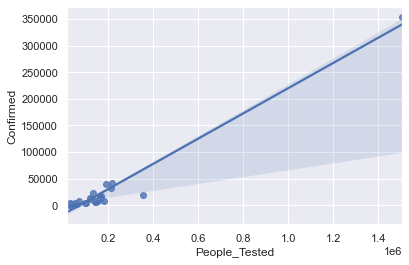

AxesSubplot(0.125,0.125;0.775x0.755)


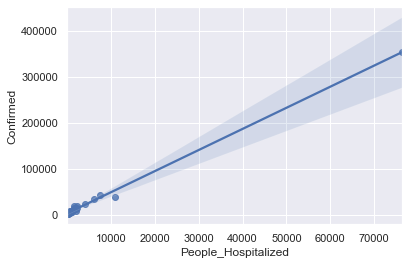

AxesSubplot(0.125,0.125;0.775x0.755)


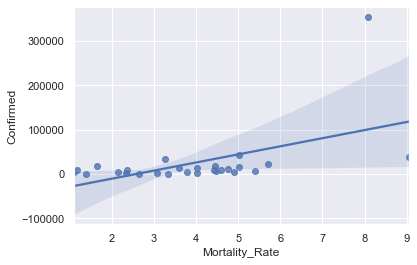

AxesSubplot(0.125,0.125;0.775x0.755)


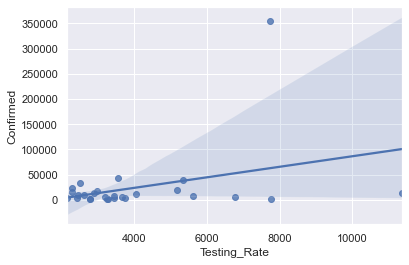

AxesSubplot(0.125,0.125;0.775x0.755)


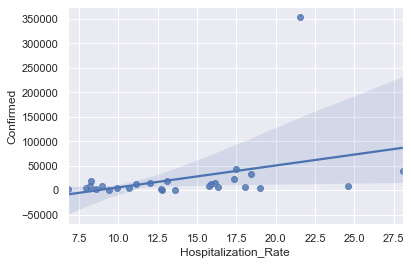

In [15]:
colc=['Deaths','Recovered','Active','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']
     
for i in range(0,9):
    print(sns.regplot(x=df[colc[i]], y='Confirmed', data=df))
    plt.show()

we see that all the variablea are positively correlated some are stronger and some are moderate

***Lets visualize using histogram***

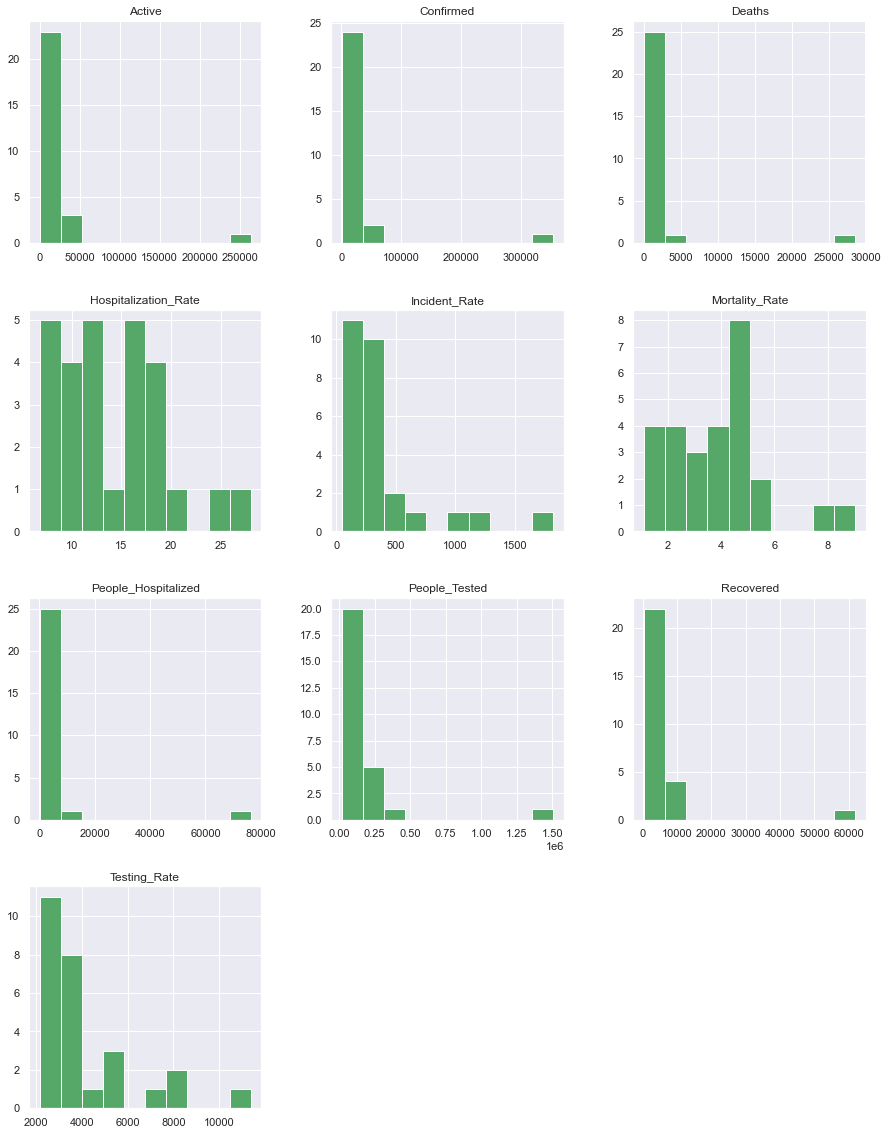

In [16]:
df.hist(figsize=(15,20),color='g')
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


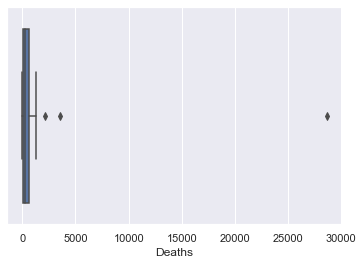

AxesSubplot(0.125,0.125;0.775x0.755)


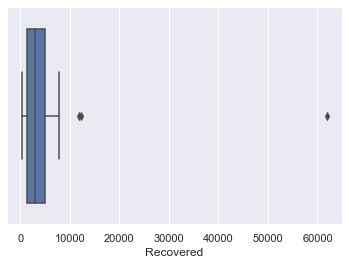

AxesSubplot(0.125,0.125;0.775x0.755)


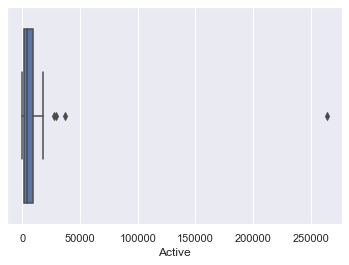

AxesSubplot(0.125,0.125;0.775x0.755)


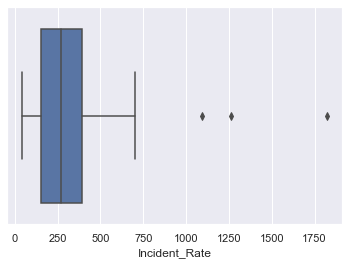

AxesSubplot(0.125,0.125;0.775x0.755)


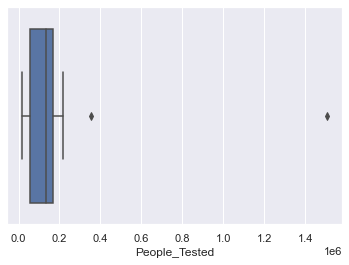

AxesSubplot(0.125,0.125;0.775x0.755)


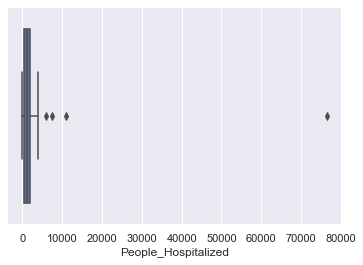

AxesSubplot(0.125,0.125;0.775x0.755)


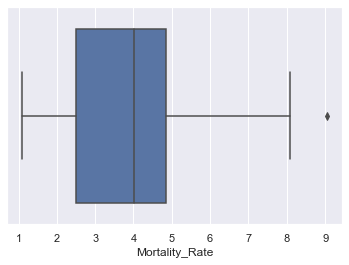

AxesSubplot(0.125,0.125;0.775x0.755)


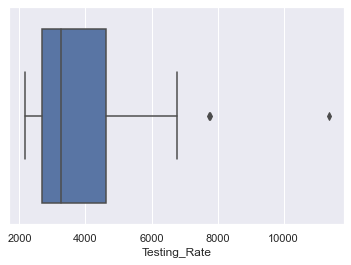

AxesSubplot(0.125,0.125;0.775x0.755)


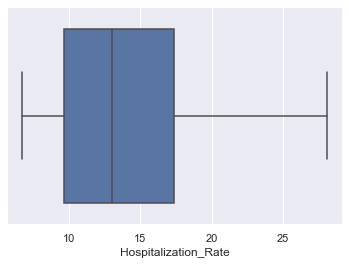

In [17]:
for i in range(0,9):
    print(sns.boxplot(x=df[colc[i]]))
    plt.show()

Since there was spikes in the number as the cases increased unexpectedly, we are not going to remove any outliers that we see as the data is actual and true

***Lets separate our dependent variable Y, in this dataset Confirmed and our independent variable X***

In [18]:
x=df[['Deaths','Recovered','Active','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']]
x.head()

,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,747,3773.0,10386.0,204.788838,165435.0,1792.0,5.011405,2272.859351,12.022005
1,107,3852.0,1044.0,165.782801,96258.0,535.0,2.138717,3189.670370,10.693584
2,1299,3478.0,18020.0,395.868121,131837.0,3955.0,5.698118,2289.339188,17.348774
3,3529,6264.0,29224.0,1094.357902,190718.0,10946.0,9.044775,5349.302875,28.054438
4,17,578.0,48.0,45.413710,46304.0,82.0,2.643857,3270.352122,12.752722


In [19]:
y=df[['Confirmed']]
y.head()

,Confirmed
0,14906
1,5003
2,22797
3,39017
4,643


***Lets check for skewness in our input features***

In [20]:
x.skew()

Deaths                  5.040241
Recovered               4.611075
Active                  4.901087
Incident_Rate           2.440177
People_Tested           4.605481
People_Hospitalized     4.958128
Mortality_Rate          0.822856
Testing_Rate            1.942515
Hospitalization_Rate    0.790119
dtype: float64

***Lets eliminate the skewness in our input attributes***

In [21]:
for i in x.skew().index:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [22]:
x.skew()

Deaths                  0.429588
Recovered               0.444265
Active                 -0.409772
Incident_Rate           0.212605
People_Tested           0.466970
People_Hospitalized     0.418722
Mortality_Rate         -0.305335
Testing_Rate            1.050624
Hospitalization_Rate    0.106520
dtype: float64

We can see that skewness is significantly reduced

***Lets scale our data using standard scalar***

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(x)
x=ss.transform(x)

Data is scaled but it is in array, lets convert it in to dataframe

x=pd.DataFrame(x)
x.columns=['Deaths','Recovered','Active','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']
x.head()

In [23]:
y.head()

,Confirmed
0,14906
1,5003
2,22797
3,39017
4,643


We have both of input and output attributes cleaned and in desired format

<h2>End of EDA Process</h2>

Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

**The output column is in Discrete. But still, the nature of the data is continious.Hence we will do regression on our dataset**

***Lets import required packages***

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [25]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [26]:
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
DTR=DecisionTreeRegressor(random_state=3)
KNR=KNeighborsRegressor()
ABR=AdaBoostRegressor(random_state=3)
RFR=RandomForestRegressor(random_state=3)
GBR=GradientBoostingRegressor(random_state=3)

In [27]:
models=[]
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))

In [28]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print(model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2*100)
    R2_score.append(r2*100)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(mse)
    score= abs(cross_val_score(model,x,y,cv=10,scoring='r2')).mean()
    print('Cross_Val_Score = ',score*100)
    cvs.append(score*100)
    print('\n')

*-----------------------------* Lasso *------------------------------*
Lasso()
R2_score =  5.029923759969024
Mean_Squared_Error = 15579698398.422241
Cross_Val_Score =  7748.194484646347


*-----------------------------* Ridge *------------------------------*
Ridge()
R2_score =  1.7974462184736417
Mean_Squared_Error = 16109981485.158815
Cross_Val_Score =  6324.388223435535


*-----------------------------* ElasticNet *------------------------------*
ElasticNet()
R2_score =  -1.333220612391628
Mean_Squared_Error = 16623562677.697294
Cross_Val_Score =  4534.606117378925


*-----------------------------* DecisionTreeRegressor *------------------------------*
DecisionTreeRegressor(random_state=3)
R2_score =  -1.0518873594058897
Mean_Squared_Error = 16577410380.0
Cross_Val_Score =  65.91078168785549


*-----------------------------* KNeighborsRegressor *------------------------------*
KNeighborsRegressor()
R2_score =  -10.234286528524073
Mean_Squared_Error = 18083769175.24
Cross_Val_Score = 

In [29]:
result = pd.DataFrame({'Regression Model': Model, 'R2 Score': R2_score ,'Mean Squared Error' :MSE,'Cross Validation score':cvs})
result

,Regression Model,R2 Score,Mean Squared Error,Cross Validation score
0,Lasso,5.029924,1.557970e+10,7748.194485
1,Ridge,1.797446,1.610998e+10,6324.388223
2,ElasticNet,-1.333221,1.662356e+10,4534.606117
3,DecisionTreeRegressor,-1.051887,1.657741e+10,65.910782
4,KNeighborsRegressor,-10.234287,1.808377e+10,63.269555
5,AdaBoostRegressor,-1.134231,1.659092e+10,65.738715
6,RandomForestRegressor,-5.805954,1.735731e+10,275.234243
7,GradientBoostingRegressor,-2.006945,1.673409e+10,64.552774


We are getting good Cross validation score for AdaBoostRegressor and DecisionTreeRegressor, since our data is too small, we are going to stop the analysis here itself, but we now know that for high dataset these two can be a good predictors

<h2>End of Machine learning Process</h2>


<h1>Now lets save our final model</h1>

In [30]:
import joblib
joblib.dump(DTR,'COVID_19.pkl')

['COVID_19.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">